In [1]:
import numpy as np
import pandas as pd
import wisps
import wisps.simulations as wispsim
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.table import Table
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database












In [2]:
bigf= wisps.get_big_file()
bigf=bigf[bigf.snr1>=3]

In [3]:
#3dhst data 
from astropy.io import ascii
hst3d= ascii.read('/users/caganze/3dhst_master.phot.v4.1/3dhst_master.phot.v4.1.cat').to_pandas()
#hst3d
def magnitude(flux):
        return 25.0-2.5*np.log10(flux)
    
def mag_err(combined):
    #combined is a pandas table with flux and flux_error
    if  np.isnan(combined['flux']):
            return np.nan
    else: return abs(0.434*2.5*combined['flux_error']/combined['flux'])


for k in ['F125', 'F606', 'F140', 'F160', 'F814']:
    hst3d[k]=magnitude(hst3d['f_{}W'.format(k)])


In [4]:
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')
maglimits=pd.DataFrame([x.mag_limits for x in pnts])
maglimits['imexp']=[x.imag_exptime for x in pnts]
#exposure_times=[np.nanmean(x.exposure_time) for x in pnts]
maglimits['pointing']=[x.name for x in pnts]
maglimits['survey']=[x.survey for x in pnts]

In [5]:
maglimits_wisp=maglimits[maglimits.survey=='wisps']
maglimits_hst3d=maglimits[maglimits.survey!='wisps']

In [6]:

wisp_ph=fits.open('/users/caganze/WISPPhotometricCatalog_v1.2.fits')

In [7]:
wt=Table(wisp_ph[1].data)

In [8]:
bigf_3d=bigf[bigf.survey=='HST3D']
bigf_w=bigf[bigf.survey != 'HST3D']

In [9]:
mag_grid=np.linspace(15, 30, 1000)

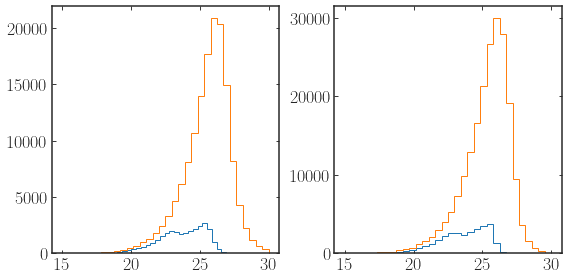

In [10]:
fig, ax=plt.subplots(ncols=2,  figsize=(8, 4))
h=ax[0].hist(bigf_3d.F140.values, range=[19, 30], bins=32, 
             histtype='step', density=False)
h=ax[0].hist(hst3d.F140.values, range=[15, 30], bins=32, histtype='step',
            density=False)

h=ax[1].hist(bigf_3d.F160.values, range=[15, 30], bins=32, histtype='step', 
             density=False)
h=ax[1].hist(hst3d.F160.values, range=[15, 30], bins=32, histtype='step',
             density=False)
plt.tight_layout()

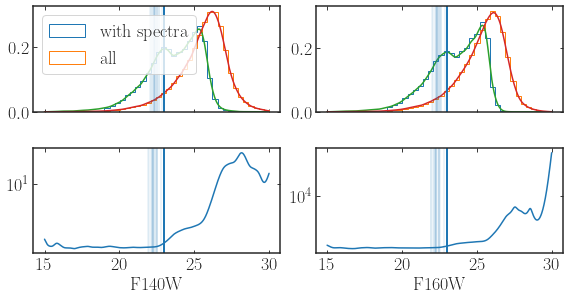

In [16]:
fig, (ax, ax1)=plt.subplots(ncols=2, nrows=2, figsize=(8, 4), 
                            sharex='col')
h=ax[0].hist(bigf_3d.F140.values, range=[19, 30], bins=32, 
             histtype='step', density=True, label='with spectra')
h=ax[0].hist(hst3d.F140.values, range=[19, 30], bins=32, histtype='step',
            density=True, label='all')

kde0=wisps.kernel_density(bigf_3d.F140[bigf_3d.F140.between(15, 30)], \
                          bw_method=0.1).pdf(mag_grid)
kde1=wisps.kernel_density(hst3d.F140[hst3d.F140.between(15, 30)],
                          bw_method=0.1).pdf(mag_grid)
ax[0].plot(mag_grid, kde0)
ax[0].plot(mag_grid, kde1)
ax1[0].plot(mag_grid, kde1/kde0)


h=ax[1].hist(bigf_3d.F160.values, range=[19, 30], bins=32, histtype='step', 
             density=True, label='with spectra')
h=ax[1].hist(hst3d.F160.values, range=[19, 30], bins=32, histtype='step',
             density=True, label='all')

kde2=wisps.kernel_density(bigf_3d.F160[bigf_3d.F160.between(15, 30)], \
                          bw_method=0.1).pdf(mag_grid)
kde3=wisps.kernel_density(hst3d.F160[hst3d.F160.between(15, 30)],
                          bw_method=0.1).pdf(mag_grid)
ax[1].plot(mag_grid, kde2)
ax[1].plot(mag_grid, kde3)
ax1[1].plot(mag_grid, kde3/kde2)

for x in maglimits_hst3d.F140.dropna().values:
    ax[0].axvline(x, alpha=0.1)
    ax[1].axvline(x, alpha=0.1)
for x in maglimits_hst3d.F160.dropna().values:
    ax1[0].axvline(x, alpha=0.1)
    ax1[1].axvline(x, alpha=0.1)

plt.tight_layout()
ax1[0].set_xlabel('F140W', fontsize=18)
ax1[1].set_xlabel('F160W', fontsize=18)
ax[0].legend()
for a in ax1:
    a.set_yscale('log')

In [12]:
#maglimits_hst3d.F140.dropna().values

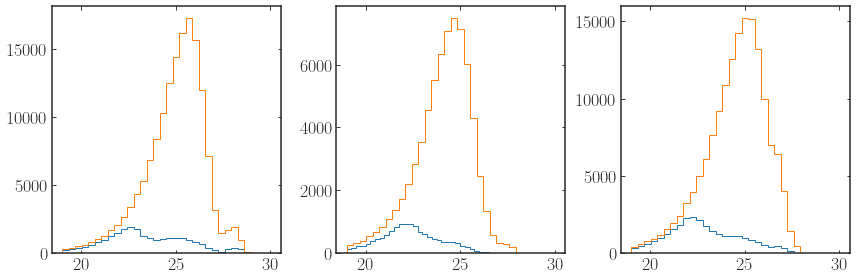

In [13]:
fig, ax=plt.subplots(ncols=3, figsize=(12, 4))
h=ax[0].hist(bigf_w.F110.values, range=[19, 30], bins=32, histtype='step')
h=ax[0].hist(np.array(wt['MAG_AUTO_F110W']), range=[19, 30], bins=32, histtype='step')

h=ax[1].hist(bigf_w.F140.values, range=[19, 27], bins=32, histtype='step')
h=ax[1].hist(np.array(wt['MAG_AUTO_F140W']), range=[19, 30], bins=32, histtype='step')

h=ax[2].hist(bigf_w.F160.values, range=[19, 30], bins=32, histtype='step')
h=ax[2].hist(np.array(wt['MAG_AUTO_F160W']), range=[19, 30], bins=32, histtype='step')

plt.tight_layout()

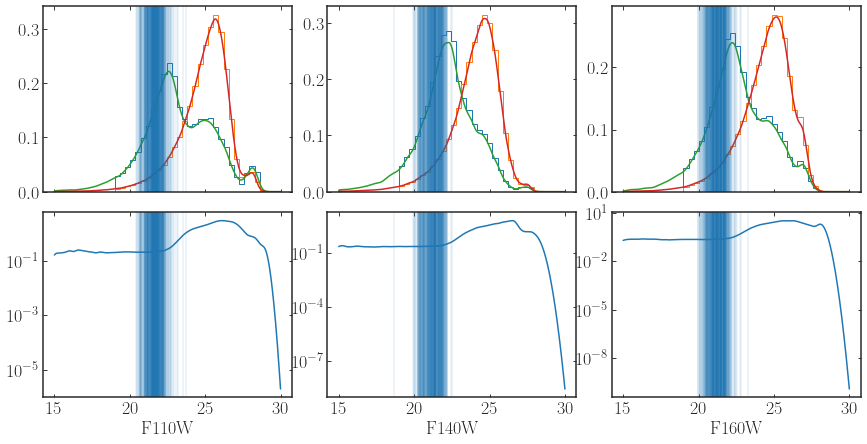

In [17]:
fig, (ax, ax1)=plt.subplots(ncols=3,nrows=2, figsize=(12, 6), sharex='col')
h=ax[0].hist(bigf_w.F110.values, range=[19, 30], bins=32, 
             histtype='step', density=True)
h=ax[0].hist(np.array(wt['MAG_AUTO_F110W']), range=[19, 30], bins=32, 
             histtype='step', density=True)

wkde0=wisps.kernel_density(bigf_w.F110[bigf_w.F110.between(15, 30)], \
                          bw_method=0.1).pdf(mag_grid)
wkde1=wisps.kernel_density(np.array(wt['MAG_AUTO_F110W'])\
                           [np.logical_and(np.array(wt['MAG_AUTO_F110W']) >15,\
                                           np.array(wt['MAG_AUTO_F110W']) <30)],
                          bw_method=0.1).pdf(mag_grid)
ax[0].plot(mag_grid, wkde0)
ax[0].plot(mag_grid, wkde1)
ax1[0].plot(mag_grid, wkde1/wkde0)

h=ax[1].hist(bigf_w.F140.values, range=[19, 30], bins=32, 
             histtype='step', density=True)
h=ax[1].hist(np.array(wt['MAG_AUTO_F140W']), range=[19, 30], bins=32, 
             histtype='step', density=True)

wkde2=wisps.kernel_density(bigf_w.F140[bigf_w.F140.between(15, 30)], \
                          bw_method=0.1).pdf(mag_grid)
wkde3=wisps.kernel_density(np.array(wt['MAG_AUTO_F140W'])\
                           [np.logical_and(np.array(wt['MAG_AUTO_F140W']) >15,\
                                           np.array(wt['MAG_AUTO_F140W']) <30)],
                          bw_method=0.1).pdf(mag_grid)
ax[1].plot(mag_grid, wkde2)
ax[1].plot(mag_grid, wkde3)
ax1[1].plot(mag_grid, wkde3/wkde2)

h=ax[-1].hist(bigf_w.F160.values, range=[19, 30], bins=32, 
             histtype='step', density=True)
h=ax[-1].hist(np.array(wt['MAG_AUTO_F160W']), range=[19, 30], bins=32, 
             histtype='step', density=True)

wkde4=wisps.kernel_density(bigf_w.F160[bigf_w.F160.between(15, 30)], \
                          bw_method=0.1).pdf(mag_grid)
wkde5=wisps.kernel_density(np.array(wt['MAG_AUTO_F160W'])\
                           [np.logical_and(np.array(wt['MAG_AUTO_F160W']) >15,\
                                           np.array(wt['MAG_AUTO_F160W']) <30)],
                          bw_method=0.1).pdf(mag_grid)
ax[-1].plot(mag_grid, wkde4)
ax[-1].plot(mag_grid, wkde5)
ax1[-1].plot(mag_grid, wkde5/wkde4)

for x in maglimits_wisp.F110.dropna().values:
    ax[0].axvline(x, alpha=0.1)
    ax1[0].axvline(x, alpha=0.1)
    
for x in maglimits_wisp.F140.dropna().values:
    ax[1].axvline(x, alpha=0.1)
    ax1[1].axvline(x, alpha=0.1)

for x in maglimits_wisp.F160.dropna().values:
    ax[-1].axvline(x, alpha=0.1)
    ax1[-1].axvline(x, alpha=0.1)
plt.tight_layout()

ax1[0].set_xlabel('F110W', fontsize=18)
ax1[1].set_xlabel('F140W', fontsize=18)
ax1[-1].set_xlabel('F160W', fontsize=18)
for a in ax1:
    a.set_yscale('log')